In [15]:
include("cutoff.jl")

hitting_times (generic function with 1 method)

In [16]:
N = 5
X₀ = rand(Uniform(-1, 1), N)
num_chains = 100000
# Dist = Uniform(-1/√N, 1/√N)
# Dist = Normal(0.0, 1)
Dist = Normal(0.0, 1/√N)
activation = σ
# activation = tanh
step_size = 0.00000001
num_steps = 200
forward = true
store_steps = false

false

Taking Step 1 of 200 steps
Taking Step 2 of 200 steps
Taking Step 3 of 200 steps
Taking Step 4 of 200 steps
Taking Step 5 of 200 steps
Taking Step 6 of 200 steps
Taking Step 7 of 200 steps
Taking Step 8 of 200 steps
Taking Step 9 of 200 steps
Taking Step 10 of 200 steps
Taking Step 11 of 200 steps
Taking Step 12 of 200 steps
Taking Step 13 of 200 steps
Taking Step 14 of 200 steps
Taking Step 15 of 200 steps
Taking Step 16 of 200 steps
Taking Step 17 of 200 steps
Taking Step 18 of 200 steps
Taking Step 19 of 200 steps
Taking Step 20 of 200 steps
Taking Step 21 of 200 steps
Taking Step 22 of 200 steps
Taking Step 23 of 200 steps
Taking Step 24 of 200 steps
Taking Step 25 of 200 steps
Taking Step 26 of 200 steps
Taking Step 27 of 200 steps
Taking Step 28 of 200 steps
Taking Step 29 of 200 steps
Taking Step 30 of 200 steps
Taking Step 31 of 200 steps
Taking Step 32 of 200 steps
Taking Step 33 of 200 steps
Taking Step 34 of 200 steps
Taking Step 35 of 200 steps
Taking Step 36 of 200 steps
T

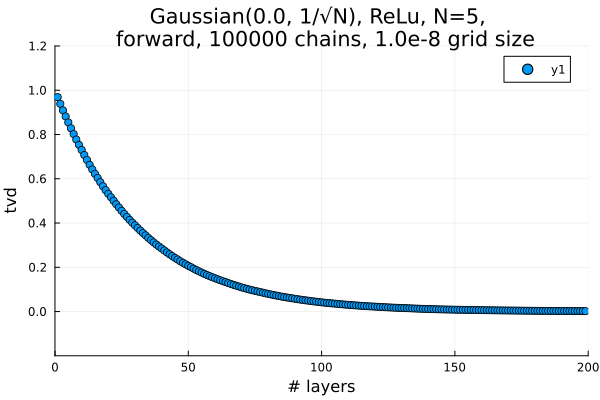

In [17]:
Exp = Experiment(X₀, N, num_chains, Dist, activation, step_size, num_steps, forward, store_steps)
Results = ExperimentResults([], [], [])

run_and_plot_tvds(Exp, Results, verbose=true, save=false)

In [ ]:
# Dists = [Uniform(-1/√N, 1/√N), Normal(0.0, 1/√N)]
# activations = [σ, tanh]

# for Dist in Dists
#     for activation in activations
#         Exp = Experiment(X₀, N, num_chains, Dist, activation, step_size, num_steps, forward, store_steps)
#         Results = ExperimentResults([], [], [])

#         run_and_plot_tvds(Exp, Results, verbose=false, save=true)
#     end
# end

In [13]:
Results.tvds

200-element Vector{Float64}:
 0.96907
 0.93931
 0.91
 0.88164
 0.8544700000000001
 0.82811
 0.80243
 0.777
 0.7524500000000001
 0.7293000000000001
 0.70634
 0.68502
 0.66316
 ⋮
 0.0024600000000000177
 0.0023699999999999832
 0.0022999999999999687
 0.0022199999999999998
 0.0021700000000000053
 0.0020799999999999708
 0.0020000000000000018
 0.0019400000000000528
 0.0018799999999999928
 0.0018399999999999528
 0.0017700000000000493
 0.0017500000000000293